In [1]:
%%capture
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local

# **Search for variations at the gene level**

We want to look at gene-level rearrangements between the reference *Arabidopsis thaliana* genome TAIR10.1 (GCF_000001735.4), assembly *Cdm-0* (GCA_904420315.1), and another arabidopsis species - *A.Arenosa*.

**Steps to achive our goal:**

1. Download .fasta and .gff files for each sample we are going to use
2. Convert gff to bed (agat) for each sample
3. Extract CDS regions
4. Using JCVI tool for cdm and ref and for ar-ref pair



---



## **Step 1. Data downloading**

We need 3 fasta files and 3 gff files

In [ ]:
!mkdir genomes

# GCA_904420315.1 (cdm-0)
!wget -O /content/genomes/cdm_ann.gff.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/904/420/315/GCA_904420315.1_AT9943.Cdm-0.scaffold/GCA_904420315.1_AT9943.Cdm-0.scaffold_genomic.gff.gz
!wget -O /content/genomes/cdm.fna.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/904/420/315/GCA_904420315.1_AT9943.Cdm-0.scaffold/GCA_904420315.1_AT9943.Cdm-0.scaffold_genomic.fna.gz

!gunzip /content/genomes/cdm.fna.gz
!gunzip /content/genomes/cdm_ann.gff.gz

# GCF_000001735.4 (TAIR10.1 reference)
!wget -O /content/genomes/ref.fna.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/735/GCF_000001735.4_TAIR10.1/GCF_000001735.4_TAIR10.1_genomic.fna.gz
!wget -O /content/genomes/ref_ann.gff.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/735/GCF_000001735.4_TAIR10.1/GCF_000001735.4_TAIR10.1_genomic.gff.gz

!gunzip /content/genomes/ref.fna.gz
!gunzip /content/genomes/ref_ann.gff.gz

# GCA_905216605.1 (A.Arenosa)
!wget -O /content/genomes/ar_ann.gff.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/905/216/605/GCA_905216605.1_AARE701a/GCA_905216605.1_AARE701a_genomic.gff.gz
!wget -O /content/genomes/ar.fna.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/905/216/605/GCA_905216605.1_AARE701a/GCA_905216605.1_AARE701a_genomic.fna.gz

!gunzip /content/genomes/ar.fna.gz
!gunzip /content/genomes/ar_ann.gff.gz

--2024-10-26 11:00:36--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/904/420/315/GCA_904420315.1_AT9943.Cdm-0.scaffold/GCA_904420315.1_AT9943.Cdm-0.scaffold_genomic.gff.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.31, 130.14.250.7, 130.14.250.10, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6923773 (6.6M) [application/x-gzip]
Saving to: ‘/content/genomes/cdm_ann.gff.gz’

/content/genomes/cd 100%[===================>]   6.60M  26.5MB/s    in 0.2s    

2024-10-26 11:00:37 (26.5 MB/s) - ‘/content/genomes/cdm_ann.gff.gz’ saved [6923773/6923773]

--2024-10-26 11:00:37--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/904/420/315/GCA_904420315.1_AT9943.Cdm-0.scaffold/GCA_904420315.1_AT9943.Cdm-0.scaffold_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.31, 130.14.250.7, 130.14.250.10, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.nc



---



## **Step 2. Get the right files**

For further work, we will need the following files for each sample:

1.   bed (convert gff to bed)
2.   cds (coding regions only)

To get them we are going to use **agat tool**.


In [ ]:
!conda create -n agat

Channels:
 - defaults
Platform: linux-64
Solving environment: | done

## Package Plan ##

  environment location: /usr/local/envs/agat



Proceed ([y]/n)? y

Preparing transaction: - done
Verifying transaction: | done
Executing transaction: - done
#
# To activate this environment, use
#
#     $ conda activate agat
#
# To deactivate an active environment, use
#
#     $ conda deactivate



In [ ]:
!source activate agat && conda install agat -c conda-forge -c bioconda

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: | / - \ done

## Package Plan ##

  environment location: /usr/local/envs/agat

  added / updated specs:
    - agat


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    _r-mutex-1.0.1             |      anacondar_1           3 KB  conda-forge
    agat-1.4.1                 | pl5321hdfd78af_0         454 KB  bioconda
    binutils_impl_linux-64-2.43|       h4bf12b8_2         5.4 MB  conda-forge
    bwidget-1.9.14             |       ha770c72_1         120 KB  conda-forge
    bzip2-1.0.8                |       h4bc722e_7         247 KB  conda-forge
    c-ares-1.34.2              |       heb4867d_0         201 KB  conda-forge
    ca-certificates-

**2.1 Convert GFF to BED**

In [ ]:
# GCA_905216605.1 (A.Arenosa)
%%capture
!source activate agat && agat_convert_sp_gff2bed.pl --gff genomes/ar_ann.gff -o agat/ar.bed

Выходные данные были обрезаны до нескольких последних строк (5000).
Using this feature template:
LR999453.1	EMBL	exon	19517156	19517579	.	-	.	ID "id-AARE701A_LOCUS8884"  ; Note "source:AUGUSTUS"  ; Parent "gene-AARE701A_LOCUS8884"  ; gbkey exon ; locus_tag AARE701A_LOCUS8884
L3 had a L1 feature but no L2 feature. Corrected by creating the intermediate L2 feature:
LR999453.1	AGAT	RNA	19534099	19535767	.	+	.	ID "gene-AARE701A_LOCUS8885"  ; Note "source:AUGUSTUS"  ; Parent "agat-gene-21231"  ; gbkey exon ; locus_tag AARE701A_LOCUS8885
Using this feature template:
LR999453.1	EMBL	exon	19534099	19534195	.	+	.	ID "id-AARE701A_LOCUS8885"  ; Note "source:AUGUSTUS"  ; Parent "gene-AARE701A_LOCUS8885"  ; gbkey exon ; locus_tag AARE701A_LOCUS8885
L3 had a L1 feature but no L2 feature. Corrected by creating the intermediate L2 feature:
LR999453.1	AGAT	RNA	19535827	19536574	.	-	.	ID "gene-AARE701A_LOCUS8886"  ; Note "source:AUGUSTUS"  ; Parent "agat-gene-21232"  ; gbkey exon ; locus_tag AARE701A_LO

In [ ]:
!head /content/agat/ar.bed

LR999458.1	1651	4811	gene-AARE701A_LOCUS20236	.	-	.	.	255,0,0	12	103,51,7,80,41,154,52,80,366,70,68,230	0,376,687,763,927,1478,1815,1938,2111,2584,2783,2930
LR999458.1	1651	4811	rna-AARE701A_LOCUS20236	0	-	1697	4692	255,0,0	12	103,51,7,80,41,154,52,80,366,70,68,230	0,376,687,763,927,1478,1815,1938,2111,2584,2783,2930
LR999458.1	8015	14180	gene-AARE701A_LOCUS20237	.	+	.	.	255,0,0	5	126,414,661,1407,1540	0,291,1158,2047,4625
LR999458.1	8015	14180	rna-AARE701A_LOCUS20237	0	+	8310	14134	255,0,0	5	126,414,661,1407,1540	0,291,1158,2047,4625
LR999458.1	20665	21461	gene-AARE701A_LOCUS20238	.	+	.	.	255,0,0	2	156,337	0,459
LR999458.1	20665	21461	rna-AARE701A_LOCUS20238	0	+	20727	21399	255,0,0	2	156,337	0,459
LR999458.1	24125	26063	gene-AARE701A_LOCUS20239	.	+	.	.	255,0,0	10	141,68,96,144,60,53,98,100,104,258	0,209,347,516,814,957,1095,1281,1461,1680
LR999458.1	24125	26063	rna-AARE701A_LOCUS20239	0	+	24187	25909	255,0,0	10	141,68,96,144,60,53,98,100,104,258	0,209,347,516,814,957,1095,1281,1461,16

In [ ]:
# GCF_000001735.4 (TAIR10.1 reference)
%%capture
!source activate agat && agat_convert_sp_gff2bed.pl --gff genomes/ref_ann.gff -o agat/ref.bed

In [ ]:
# GCA_904420315.1 (cdm-0)
%%capture
!source activate agat && agat_convert_sp_gff2bed.pl --gff genomes/cdm_ann.gff -o agat/cdm.bed

**2.2 Extract CDS from fasta**

In [ ]:
%%capture
# GCA_905216605.1 (A.Arenosa)
!source activate agat && agat_sp_extract_sequences.pl -g genomes/ar_ann.gff -f genomes/ar.fna -o agat/ar.cds

In [ ]:
%%capture
# GCF_000001735.4 (TAIR10.1 reference)
!source activate agat && agat_sp_extract_sequences.pl -g genomes/ref_ann.gff -f genomes/ref.fna -o agat/ref.cds

In [ ]:
%%capture
# GCA_904420315.1 (cdm-0)
!source activate agat && agat_sp_extract_sequences.pl -g genomes/cdm_ann.gff -f genomes/cdm.fna -o agat/cdm.cds



---



## **Step 3. Using JCVI**

In [2]:
!conda create -n jcvi

Channels:
 - defaults
Platform: linux-64
Solving environment: - done

## Package Plan ##

  environment location: /usr/local/envs/jcvi



Proceed ([y]/n)? y

Preparing transaction: | done
Verifying transaction: - done
Executing transaction: | done
#
# To activate this environment, use
#
#     $ conda activate jcvi
#
# To deactivate an active environment, use
#
#     $ conda deactivate



In [3]:
!source activate jcvi && conda install jcvi -c conda-forge -c bioconda

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local/envs/jcvi

  added / updated specs:
    - jcvi


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    _r-mutex-1.0.1             |      anacondar_1           3 KB  conda-forge
    alsa-lib-1.2.12            |       h4ab18f5_0         543 KB  conda-forge
    argcomplete-3.5.1          |     pyhd8ed1ab_0          40 KB  conda-forge
    argh-0.31.3                |     pyhd8ed1ab_0          44 KB  conda-forge
    atk-1.0-2.38.0             |       h04ea711_2         348 KB  conda-forge
    attr-2.5.1                 |       h166bdaf_1          69 KB  conda-forge
    b

In [4]:
!source activate jcvi && conda install last -c conda-forge -c bioconda

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: | / - \ | / - \ | / - \ | / done

# All requested packages already installed.



**3.1 Cdm-0 to Reference**

In [ ]:
!source activate jcvi && python -m jcvi.compara.catalog ortholog cdm ref --cscore=.99 --no_strip_names

[10/26/24 12:06:33] DEBUG    lastdb ref ref.cds                                         ]8;id=233923;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=414355;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#1191\1191]8;;\
[10/26/24 12:08:18] DEBUG    lastal -u 0 -i3G -f BlastTab -P 2 ref cdm.cds              ]8;id=248193;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=431811;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#1191\1191]8;;\
                             >./cdm.ref.last                                                        
[10/26/24 12:11:37] DEBUG    Assuming --qbed=cdm.bed --sbed=ref.bed                   ]8;id=974901;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py\synteny.py]8;;\:]8;id=154438;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py#390

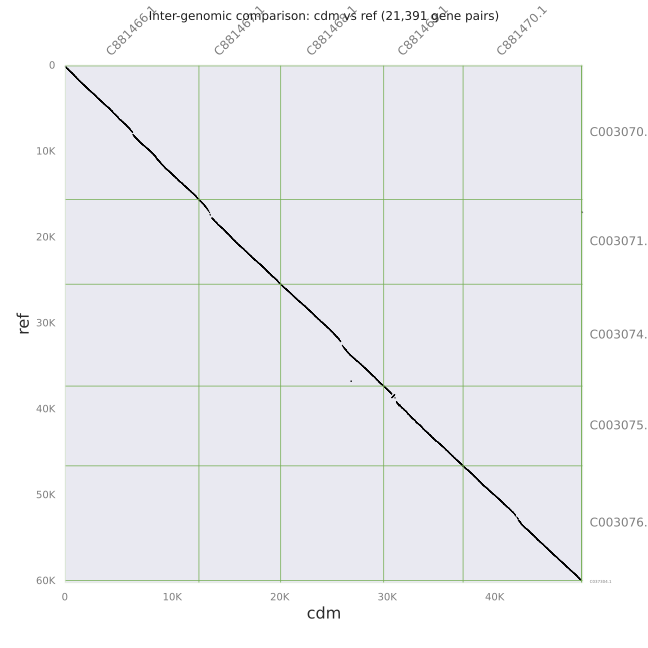

In [ ]:
!source activate jcvi && python -m jcvi.compara.synteny depth --histogram cdm.ref.anchors

[10/26/24 12:17:16] DEBUG    Assuming --qbed=cdm.bed --sbed=ref.bed                   ]8;id=896708;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py\synteny.py]8;;\:]8;id=93404;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py#390\390]8;;\
                    DEBUG    Load file `cdm.bed`                                          ]8;id=1370;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=818789;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
[10/26/24 12:17:17] DEBUG    Load file `ref.bed`                                          ]8;id=131071;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=608228;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
[10/26/24 12:17:19] DEBUG    Load file `cdm.ref.anchors`                            

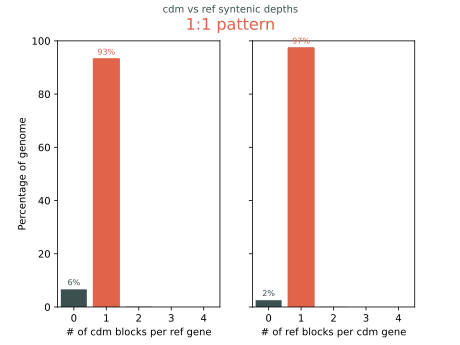

In [ ]:
# Did not include small one (-2 in ref and -1 in cdm)
!cat seqids

LR881469.1,LR881470.1,LR881468.1,LR881466.1,LR881467.1
NC_003075.7,NC_003071.7,NC_003074.8,NC_003076.8,NC_003070.9

In [ ]:
!cat layout

# y, xstart, xend, rotation, color, label, va,  bed
 .6,     .1,    .8,       0,      , Cdm-0, top, cdm.bed
 .4,     .1,    .8,       0,      , Ref, top, ref.bed
# edges
e, 0, 1, cdm.ref.anchors.simple

In [ ]:
!source activate jcvi && python -m jcvi.compara.synteny screen --minspan=30 --simple cdm.ref.anchors cdm.ref.anchors.new

[10/26/24 12:46:12] DEBUG    Load file `cdm.ref.anchors`                                  ]8;id=34879;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=5771;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
                    DEBUG    Assuming --qbed=cdm.bed --sbed=ref.bed                   ]8;id=192022;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py\synteny.py]8;;\:]8;id=371538;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py#390\390]8;;\
                    DEBUG    Load file `cdm.bed`                                          ]8;id=481989;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=414584;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
[10/26/24 12:46:13] DEBUG    Load file `ref.bed`                                    

In [ ]:
!source activate jcvi && python -m jcvi.graphics.karyotype seqids layout

[10/26/24 12:47:59] INFO     `latex` not found. latex use is disabled.                   ]8;id=283740;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=618002;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#614\614]8;;\
                    INFO     `lp` not found. latex use is disabled.                      ]8;id=649591;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=791667;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#616\616]8;;\
                    INFO     Set text.usetex=False. Font styles may be inconsistent.     ]8;id=546322;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py\base.py]8;;\:]8;id=982165;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py#453\453]8;;\
                    DEBUG    Load file `layout`                                           ]8;i

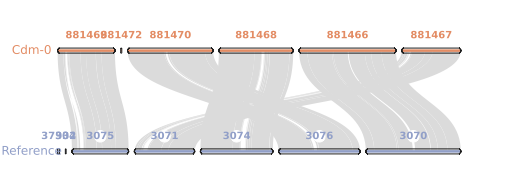

**Delete small chroms to get better looking image**

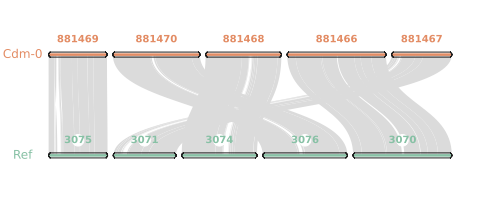

**3.2 Arenosa to Reference**

In [ ]:
!source activate jcvi && python -m jcvi.compara.catalog ortholog ref ar --cscore=.99 --no_strip_names

[10/26/24 12:54:25] DEBUG    lastdb ar ar.cds                                           ]8;id=732603;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=579546;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#1191\1191]8;;\
[10/26/24 12:54:54] DEBUG    lastal -u 0 -i3G -f BlastTab -P 2 ar ref.cds               ]8;id=288616;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=605928;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#1191\1191]8;;\
                             >./ref.ar.last                                                         
[10/26/24 13:01:19] DEBUG    Assuming --qbed=ref.bed --sbed=ar.bed                    ]8;id=17927;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py\synteny.py]8;;\:]8;id=176076;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py#390\

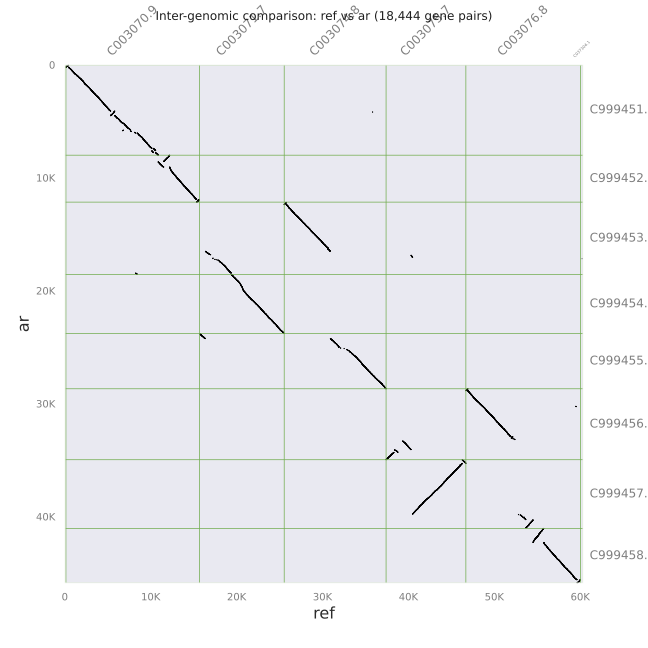

In [ ]:
!source activate jcvi && python -m jcvi.compara.synteny screen --minspan=30 --simple ref.ar.anchors ref.ar.anchors.new

[10/26/24 13:03:26] DEBUG    Load file `ref.ar.anchors`                                   ]8;id=47490;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=947421;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
                    DEBUG    Assuming --qbed=ref.bed --sbed=ar.bed                    ]8;id=40784;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py\synteny.py]8;;\:]8;id=531722;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py#390\390]8;;\
                    DEBUG    Load file `ref.bed`                                          ]8;id=272428;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=341050;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
[10/26/24 13:03:27] DEBUG    Load file `ar.bed`                                    

**3.3 Merge previous steps to get the resulting image**

**seqids:**
```
LR881469.1,LR881470.1,LR881468.1,LR881466.1,LR881467.1
NC_003075.7,NC_003071.7,NC_003074.8,NC_003076.8,NC_003070.9
LR999458.1,LR999457.1,LR999454.1,LR999452.1,LR999453.1,LR999451.1,LR999456.1,LR999455.1
```



**layout:**

```
# y, xstart, xend, rotation, color, label, va,  bed
 .7,     .1,    .8,      15,      , Cdm, top, cdm.bed
 .5,     .1,    .8,       0,      , Ref, top, ref.bed
 .3,     .1,    .8,     -15,      , Arenosa, bottom, ar.bed
# edges
e, 0, 1, cdm.ref.anchors.simple
e, 1, 2, ref.ar.anchors.simple
```



In [ ]:
!source activate jcvi && python -m jcvi.graphics.karyotype seqids layout

[10/26/24 13:06:29] INFO     `latex` not found. latex use is disabled.                   ]8;id=757729;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=561288;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#614\614]8;;\
                    INFO     `lp` not found. latex use is disabled.                      ]8;id=213133;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=96532;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#616\616]8;;\
                    INFO     Set text.usetex=False. Font styles may be inconsistent.     ]8;id=342682;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py\base.py]8;;\:]8;id=151289;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py#453\453]8;;\
                    DEBUG    Load file `layout`                                           ]8;id

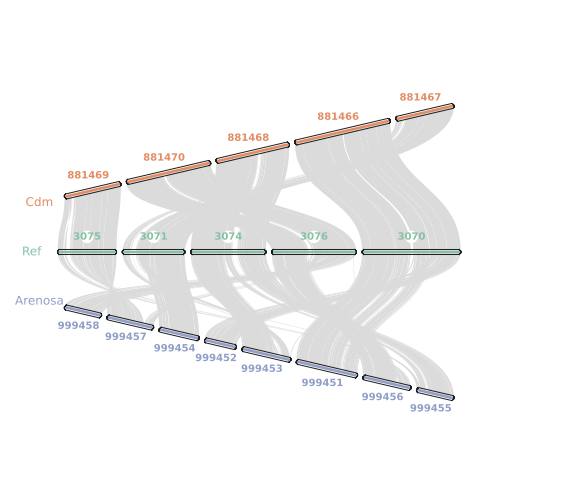



---

> **We are going to change the order of the chroms to made it more comprehensive.**

**changed seqids:**
```
LR881469.1,LR881467.1,LR881468.1,LR881470.1,LR881466.1
NC_003075.7,NC_003071.7,NC_003074.8,NC_003076.8,NC_003070.9
LR999457.1,LR999454.1,LR999453.1,LR999455.1,LR999456.1,LR999458.1,LR999451.1,LR999452.1
```

In [ ]:
!source activate jcvi && python -m jcvi.graphics.karyotype seqids layout

[10/26/24 13:16:33] INFO     `latex` not found. latex use is disabled.                   ]8;id=274577;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=742930;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#614\614]8;;\
                    INFO     `lp` not found. latex use is disabled.                      ]8;id=102222;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=860818;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#616\616]8;;\
                    INFO     Set text.usetex=False. Font styles may be inconsistent.     ]8;id=38236;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py\base.py]8;;\:]8;id=347647;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py#453\453]8;;\
                    DEBUG    Load file `layout`                                           ]8;id

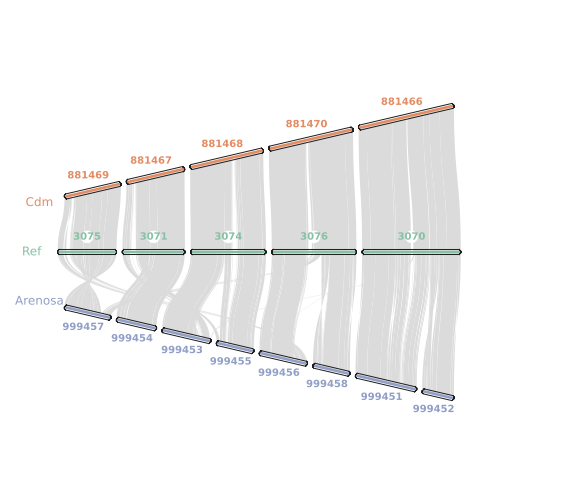

In [ ]:
!source activate jcvi && python -m jcvi.compara.synteny mcscan cdm.bed cdm.ref.lifted.anchors --iter=1 -o cdm.ref.i1.blocks

[10/26/24 14:08:25] DEBUG    Load file `ref.bed`                                          ]8;id=672133;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=534709;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
[10/26/24 14:08:27] DEBUG    Load file `cdm.ref.lifted.anchors`                           ]8;id=12182;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=50970;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
Chain started: 69 blocks
Chain 0: score=44029 2 blocks remained..
[10/26/24 14:08:29] DEBUG    MCscan blocks written to `ref.cdm.i1.blocks`.           ]8;id=761144;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py\synteny.py]8;;\:]8;id=760865;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py#1557\1557]8;;\


In [39]:
!head -50 cdm.ref.i1.blocks > blocks

In [ ]:
!source activate jcvi && python -m jcvi.formats.bed merge cdm.bed ref.bed -o cdm_ref.bed

[10/26/24 14:13:45] DEBUG    Load file `ref.bed`                                          ]8;id=626953;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=671855;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
[10/26/24 14:13:46] DEBUG    Load file `cdm.bed`                                          ]8;id=166396;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=505967;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\


In [ ]:
!source activate jcvi && python -m jcvi.graphics.synteny blocks cdm_ref.bed blocks.layout --glyphcolor=orthogroup

[10/26/24 14:15:11] INFO     `latex` not found. latex use is disabled.                   ]8;id=170294;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=228515;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#614\614]8;;\
                    INFO     `lp` not found. latex use is disabled.                      ]8;id=72151;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=507574;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#616\616]8;;\
                    INFO     Set text.usetex=False. Font styles may be inconsistent.     ]8;id=919696;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py\base.py]8;;\:]8;id=799701;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py#453\453]8;;\
                    DEBUG    Load file `ref_cdm.bed`                                      ]8;id

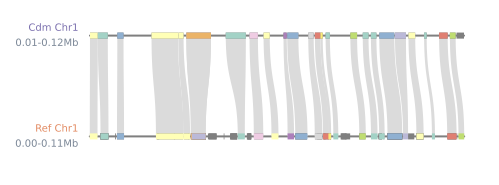



---

**Trying to get the names of the genes (not working)**

In [40]:
!cut -f2 blocks > rna_names.txt

In [41]:
!awk 'NF>0 && $1!="."' rna_names.txt > rna_names_clean.txt

In [42]:
# Чтение идентификаторов
with open('rna_names_clean.txt', 'r') as f:
    ids = set(line.strip() for line in f)

# Поиск и запись совпадений
with open('sequence.gff3', 'r') as infile, open('rna_with_meta.txt', 'w') as outfile:
    for line in infile:
        if any(id in line for id in ids):
            outfile.write(line)

In [43]:
print(ids)

{'rna-NM_001197954.2', 'rna-NM_100005.3', 'PPa1', 'rna-NM_001331255.1', 'NGA3', 'rna-NM_099999.4', 'ARV1', 'rna-NM_100008.4', 'rna-NM_100002.4', 'rna-NM_001123732.2', 'rna-NM_099994.4', 'rna-NM_099995.2', 'rna-NM_100001.2', 'DCL1', 'rna-NM_001035847.1', 'rna-NM_100000.3', 'rna-NM_100010.3', 'NAC001', 'rna-NM_001331256.1', 'rna-NM_100007.3', 'rna-NM_099996.4', 'rna-NM_099998.4', 'rna-NM_001083968.1', 'rna-NM_099997.3', 'PDH-E1 ALPHA'}




---

**Just nother version of graph above, but ref-cdm version not cdm-ref**

In [5]:
!source activate jcvi && python -m jcvi.compara.catalog ortholog ref cdm --cscore=.99 --no_strip_names

[10/29/24 18:08:27] DEBUG    lastdb cdm cdm.cds                                         ]8;id=578998;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=151742;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#1191\1191]8;;\
[10/29/24 18:08:51] DEBUG    lastal -u 0 -i3G -f BlastTab -P 2 cdm ref.cds              ]8;id=358061;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=172235;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#1191\1191]8;;\
                             >./ref.cdm.last                                                        
[10/29/24 18:13:45] DEBUG    Assuming --qbed=ref.bed --sbed=cdm.bed                   ]8;id=170577;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py\synteny.py]8;;\:]8;id=228891;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py#390

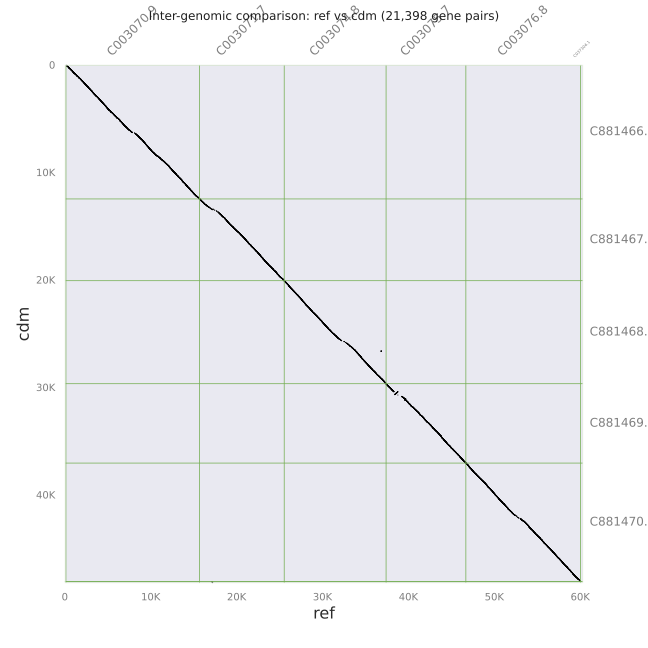

---
**This part does not work for no reason**



In [ ]:
!source activate jcvi && python -m jcvi.compara.synteny screen --minspan=30 --simple ref.cdm.anchors ref.cdm.anchors.new

[10/26/24 17:27:38] DEBUG    Load file `ref.cdm.anchors`                                  ]8;id=697536;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=868625;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
                    DEBUG    Assuming --qbed=ref.bed --sbed=cdm.bed                   ]8;id=50121;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py\synteny.py]8;;\:]8;id=261020;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py#390\390]8;;\
                    DEBUG    Load file `ref.bed`                                          ]8;id=456818;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=545340;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
[10/26/24 17:27:39] DEBUG    Load file `cdm.bed`                                  

In [ ]:
!source activate jcvi && python -m jcvi.compara.synteny mcscan ref.bed ref.cdm.lifted.anchors --iter=1 -o ref.cdm.i1.blocks

[10/26/24 17:30:56] DEBUG    Load file `ref.bed`                                          ]8;id=877290;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=941396;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
[10/26/24 17:30:57] DEBUG    Load file `ref.cdm.lifted.anchors`                           ]8;id=999887;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=803037;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
Chain started: 70 blocks
Chain 0: score=44284 2 blocks remained..
[10/26/24 17:30:58] DEBUG    MCscan blocks written to `ref.cdm.i1.blocks`.           ]8;id=611009;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py\synteny.py]8;;\:]8;id=624165;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/compara/synteny.py#1557\1557]8;;\


In [ ]:
!source activate jcvi && python -m jcvi.formats.base join ref.cdm.i1.blocks ref.ar.i1.blocks --noheader | cut -f1,2,4,6 > ref.blocks

[10/26/24 17:32:15] DEBUG    Load file `ref.cdm.i1.blocks`                                ]8;id=900723;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=383943;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
                    DEBUG    Imported 60345 records from `ref.cdm.i1.blocks`             ]8;id=323890;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=460321;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#101\101]8;;\
                    DEBUG    Load file `ref.ar.i1.blocks`                                 ]8;id=839040;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=877956;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
[10/26/24 17:32:16] DEBUG    Imported 60345 records from `ref.ar.i1.blocks`            

In [ ]:
!head -50 ref.blocks > blocks3

In [ ]:
!head -n 20 blocks3

rna-ArthCt088	.	.
rna-ArthCp002	rna-AT9943_LOCUS23351	.
rna-ArthCt089	.	.
rna-ArthCp003	.	.
rna-ArthCp004	.	.
rna-ArthCt090	.	.
rna-ArthCp005	.	.
rna-ArthCp006	.	.
rna-ArthCt091	.	.
rna-ArthCt092	.	.
rna-ArthCt093	.	.
rna-ArthCp007	.	.
rna-ArthCp008	.	.
rna-ArthCp009	rna-AT9943_LOCUS23347	.
rna-ArthCp010	rna-AT9943_LOCUS23347	.
rna-ArthCp011	rna-AT9943_LOCUS23347	.
rna-ArthCp012	rna-AT9943_LOCUS23350	.
rna-ArthCp013	rna-AT9943_LOCUS23350	.
rna-ArthCp014	rna-AT9943_LOCUS23350	.
rna-ArthCt094	.	.


In [ ]:
!source activate jcvi && python -m jcvi.formats.bed merge ref.bed cdm.bed ar.bed -o ref_cdm_ar.bed

[10/26/24 17:38:18] DEBUG    Load file `ref.bed`                                          ]8;id=43631;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=396992;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
[10/26/24 17:38:19] DEBUG    Load file `cdm.bed`                                          ]8;id=16842;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=531374;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
[10/26/24 17:38:20] DEBUG    Load file `ar.bed`                                           ]8;id=51591;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=431206;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\


In [ ]:
!source activate jcvi && python -m jcvi.graphics.synteny blocks3 ref_cdm_ar.bed blocks3.layout

[10/26/24 17:51:20] INFO     `latex` not found. latex use is disabled.                   ]8;id=657191;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=372789;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#614\614]8;;\
                    INFO     `lp` not found. latex use is disabled.                      ]8;id=964071;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=453384;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#616\616]8;;\
                    INFO     Set text.usetex=False. Font styles may be inconsistent.     ]8;id=962025;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py\base.py]8;;\:]8;id=546515;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py#453\453]8;;\
                    DEBUG    Load file `ref_cdm_ar.bed`                                   ]8;i



---



In [ ]:
!source activate jcvi && python -m jcvi.formats.bed merge ref.bed ar.bed -o ref_ar.bed

[10/26/24 14:26:41] DEBUG    Load file `ref.bed`                                          ]8;id=913797;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=287249;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\
[10/26/24 14:26:43] DEBUG    Load file `ar.bed`                                           ]8;id=341777;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py\base.py]8;;\:]8;id=795730;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/formats/base.py#36\36]8;;\


In [ ]:
!source activate jcvi && python -m jcvi.graphics.synteny blocks ref_ar.bed blocks2.layout --glyphcolor=orthogroup

[10/26/24 14:36:09] INFO     `latex` not found. latex use is disabled.                   ]8;id=129696;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=58284;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#614\614]8;;\
                    INFO     `lp` not found. latex use is disabled.                      ]8;id=570566;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=677310;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#616\616]8;;\
                    INFO     Set text.usetex=False. Font styles may be inconsistent.     ]8;id=744539;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py\base.py]8;;\:]8;id=448405;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py#453\453]8;;\
                    DEBUG    Load file `ref_ar.bed`                                       ]8;id

In [ ]:
!source activate jcvi && python -m jcvi.graphics.synteny blocks ref_ar.bed blocks2.layout --glyphcolor=orthogroup

[10/26/24 14:40:09] INFO     `latex` not found. latex use is disabled.                   ]8;id=356279;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=800812;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#614\614]8;;\
                    INFO     `lp` not found. latex use is disabled.                      ]8;id=71482;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=148200;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#616\616]8;;\
                    INFO     Set text.usetex=False. Font styles may be inconsistent.     ]8;id=14939;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py\base.py]8;;\:]8;id=753146;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py#453\453]8;;\
                    DEBUG    Load file `ref_ar.bed`                                       ]8;id=



---



## **Here I'm trying to get only regions from the first chromosome where there's a mini inversion, but it won't plot**



> **UPDATE:** Ask smn to plot it and it worked so maybe some problems with colab occured



In [ ]:
#Make blocks.layout to match example
blocks_layout_string='''# x,   y, rotation,   ha,     va,   color, ratio,            label
0.5, 0.6,        0, left, center,       m,     1,       Ref Chr1
0.5, 0.4,        0, left, center, #fc8d62,     1,       Cdm Chr1
# edges
e, 0, 1'''
!echo "{blocks_layout_string}">blocks.layout

In [ ]:
!grep "ref_NC_003075.7" ref_cdm.bed > ref_3075.7.bed

In [ ]:
!head ref_3075.7.bed

ref_NC_003075.7	1179	1536	rna-NM_001160719.1	0	-	1179	1536	255,0,0	1	357	0
ref_NC_003075.7	2894	10364	rna-NM_001160720.1	0	-	2894	10364	255,0,0	22	128,23,212,205,63,143,183,199,72,112,82,51,82,186,102,34,127,125,975,162,144,154	0,1232,1332,1650,1944,2082,2511,2762,3710,3865,4080,4249,4399,4558,4817,5019,5134,5349,5568,6791,7087,7316
ref_NC_003075.7	3892	10504	rna-NM_001340223.1	0	-	4972	10364	255,0,0	18	280,485,281,183,199,72,112,82,51,82,186,123,155,125,975,162,144,294	0,372,946,1513,1764,2712,2867,3082,3251,3401,3560,3819,4108,4351,4570,5793,6089,6318
ref_NC_003075.7	3892	10504	rna-NM_001340224.1	0	-	4475	10364	255,0,0	19	280,485,63,143,183,199,72,112,82,51,82,186,123,155,125,975,162,144,294	0,372,946,1084,1513,1764,2712,2867,3082,3251,3401,3560,3819,4108,4351,4570,5793,6089,6318
ref_NC_003075.7	3892	10504	rna-NM_001340225.1	0	-	4198	10364	255,0,0	19	546,205,63,143,183,199,72,112,82,51,82,186,123,155,125,975,162,144,294	0,652,946,1084,1513,1764,2712,2867,3082,3251,3401,3560,3819,4108

In [ ]:
!cut -f 4 ref_3075.7.bed > ids.txt

In [ ]:
!grep -f ids.txt ref.cdm.i1.blocks > filtered.blocks

In [ ]:
!source activate jcvi && python -m jcvi.graphics.synteny filtered.blocks ref_cdm.bed blocks.layout --png

[10/26/24 20:33:23] INFO     `latex` not found. latex use is disabled.                   ]8;id=706712;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=398454;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#614\614]8;;\
                    INFO     `lp` not found. latex use is disabled.                      ]8;id=256346;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=950917;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#616\616]8;;\
                    INFO     Set text.usetex=False. Font styles may be inconsistent.     ]8;id=452843;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py\base.py]8;;\:]8;id=376715;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py#453\453]8;;\
usage: 
synteny.py mcscan.txt all.bed layout.csv

Illustrate MCscan multiple collinearity align

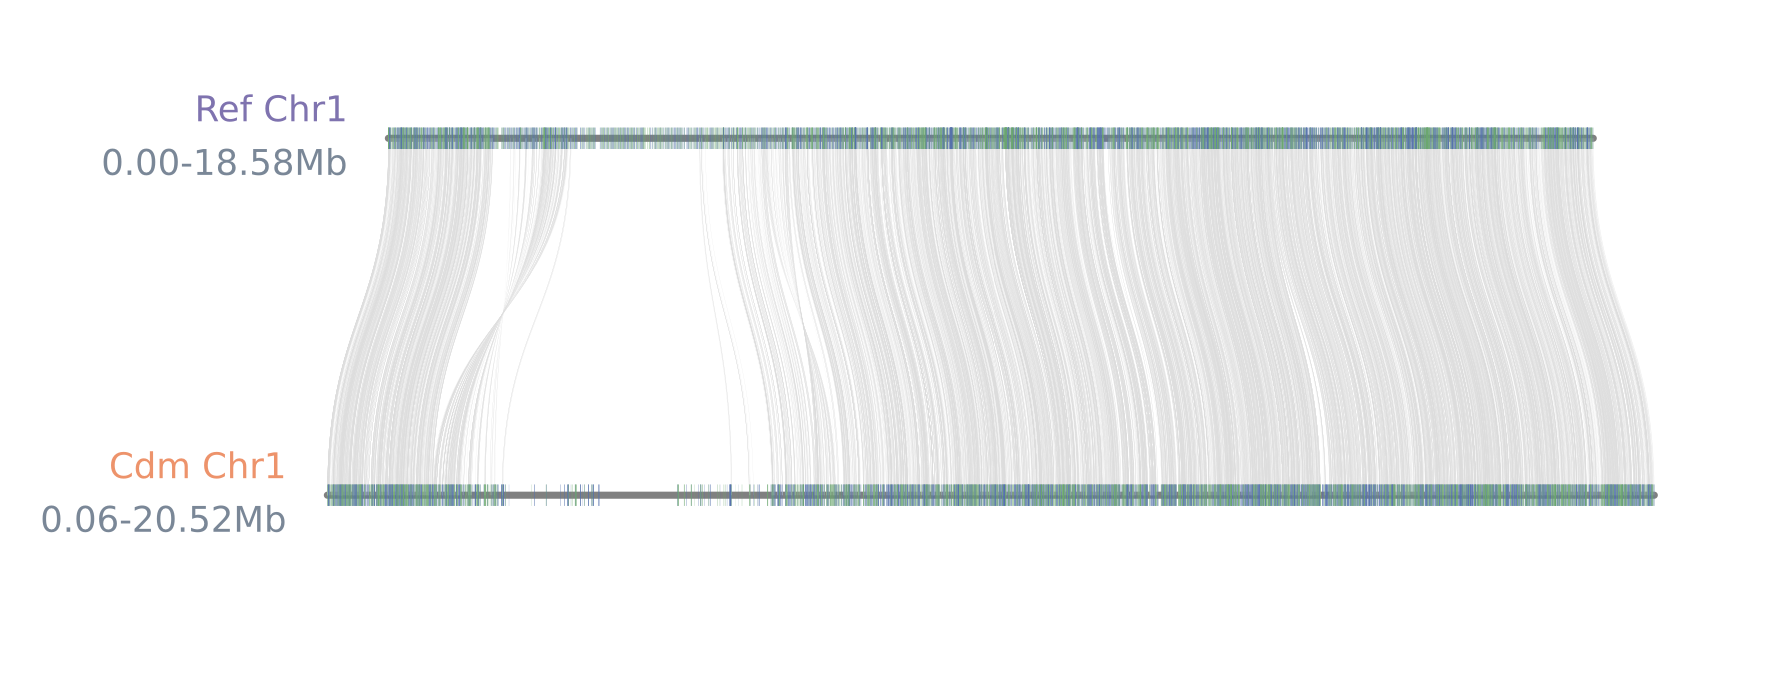



---

**Trying to get the part with inversion**

In [6]:
!head -2500 filtered.blocks > filtered2500.blocks

In [7]:
!source activate jcvi && python -m jcvi.graphics.synteny filtered2500.blocks ref_cdm.bed blocks.layout

[10/29/24 18:31:08] INFO     `latex` not found. latex use is disabled.                   ]8;id=818640;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=109948;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#614\614]8;;\
                    INFO     `lp` not found. latex use is disabled.                      ]8;id=637305;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=9478;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#616\616]8;;\
                    INFO     Set text.usetex=False. Font styles may be inconsistent.     ]8;id=515460;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py\base.py]8;;\:]8;id=656756;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py#453\453]8;;\
                    DEBUG    Load file `ref_cdm.bed`                                      ]8;id=

In [16]:
#Get the lines with inversion
!awk 'NR>=800 && NR<=1500' filtered2500.blocks > filtered800_1500.blocks

In [37]:
!source activate jcvi && python -m jcvi.graphics.synteny filtered800_1500.blocks ref_cdm.bed blocks.layout

[10/29/24 20:28:22] INFO     `latex` not found. latex use is disabled.                   ]8;id=704146;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=398356;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#614\614]8;;\
                    INFO     `lp` not found. latex use is disabled.                      ]8;id=464985;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py\base.py]8;;\:]8;id=150528;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/apps/base.py#616\616]8;;\
                    INFO     Set text.usetex=False. Font styles may be inconsistent.     ]8;id=874835;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py\base.py]8;;\:]8;id=926729;file:///usr/local/envs/jcvi/lib/python3.10/site-packages/jcvi/graphics/base.py#453\453]8;;\
                    DEBUG    Load file `ref_cdm.bed`                                      ]8;i

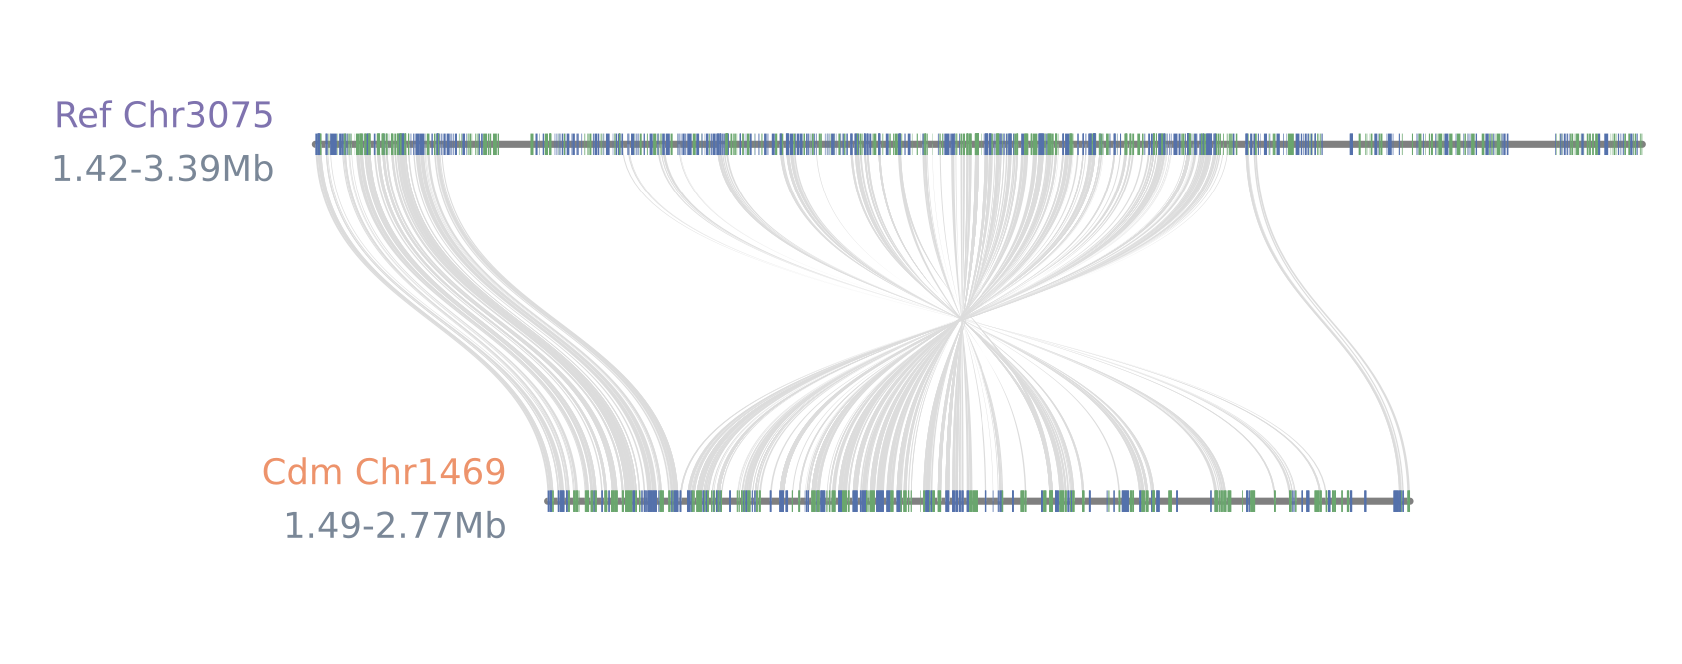

In [38]:
!cat /content/blocks.layout

# x,   y, rotation,   ha,     va,   color, ratio,            label
0.5, 0.6,        0, left, center,       m,     1,       Ref Chr3075
0.5, 0.4,        0, left, center, #fc8d62,     1,       Cdm Chr1469
# edges
e, 0, 1



---
**Trying to get the names of inverted genes**


In [27]:
#need id from the blocks to search them in gff3
!cut -f1 filtered800_1500.blocks > id.txt

In [28]:
# Чтение идентификаторов
with open('id.txt', 'r') as f:
    ids = set(line.strip() for line in f)

# Поиск и запись совпадений
with open('sequence.gff3', 'r') as infile, open('matched_annotations.txt', 'w') as outfile:
    for line in infile:
        if any(id in line for id in ids):
            outfile.write(line)

In [29]:
!awk '$3=="mRNA"' matched_annotations.txt > inverted_genes.txt

In [35]:
#only needed info (id, gene, product)
!awk -F'\t' '{split($9,a,";"); for(i in a){if(a[i]~/^ID=/){id=a[i]} if(a[i]~/^gene=/){gene=a[i]} if(a[i]~/^product=/){prod=a[i]}} printf "%s\t%s\t%s\t%s\t%s", $1,$3,$4,$5,id; if(gene!="") printf "\t%s",gene; if(prod!="") printf "\t%s",prod; printf "\n"}' inverted_genes.txt > filt_inverted_genes.txt

In [33]:
#only unique gene names
!awk -F'\t' '$6~/^gene=/ && !seen[substr($6,6)]++' filt_inverted_genes.txt > unique_inverted_genes.txt

In [34]:
!cat unique_inverted_genes.txt

NC_003075.7	mRNA	1431844	1433861	ID=rna-NM_116565.2	gene=CYCD6%3B1	product=Cyclin D6%3B1
NC_003075.7	mRNA	1440146	1441863	ID=rna-NM_116566.4	gene=PETC	product=photosynthetic electron transfer C
NC_003075.7	mRNA	1464467	1466174	ID=rna-NM_116570.5	gene=Tic20-IV	product=translocon at the inner envelope membrane of chloroplasts 20-IV
NC_003075.7	mRNA	1466284	1467750	ID=rna-NM_116571.3	gene=SYP123	product=syntaxin of plants 123
NC_003075.7	mRNA	1473718	1474509	ID=rna-NM_116573.1	gene=EVE1	product=ubiquitin family protein
NC_003075.7	mRNA	1490426	1495214	ID=rna-NM_116577.5	gene=SRF3	product=STRUBBELIG-receptor family 3
NC_003075.7	mRNA	1497536	1501599	ID=rna-NM_001340446.1	gene=DFL2	product=Auxin-responsive GH3 family protein
NC_003075.7	mRNA	1503492	1506535	ID=rna-NM_001340447.1	gene=PP2C52	product=Protein phosphatase 2C family protein
NC_003075.7	mRNA	1516030	1520563	ID=rna-NM_001340449.1	gene=EMB2770	product=pre-mRNA splicing factor-like protein
NC_003075.7	mRNA	1557120	1559428	ID=rna-NM_

In [36]:
!cut -f6 unique_inverted_genes.txt > gene_names.txt